In [1]:
import glob
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
b19df = pd.read_csv('B19 Mapped Dust Outputs/B19_Master_DF2.csv')
#b19df = b19df.drop(b19df.columns[0], axis=1)

fitcoord_df = pd.read_csv('fitcoord csvs/codark_fulldf_I.csv')

b19df

lat_b19 = b19df['l'].to_numpy()

In [3]:
fitcoord_df

,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit
0,150120,4067,HI,1,10.608966,0.261963,1.221581,0.148003,5.192746,0.148060,118.141440,3.256637,Ursa Major,F
1,150120,4067,67,1,0.003397,0.001488,-3.658921,1.611335,3.183563,1.611335,0.023558,0.006776,Ursa Major,F
2,150120,4067,65,1,0.002466,0.001126,1.338215,2.935009,5.567352,2.935009,0.037056,0.009872,Ursa Major,F
3,150120,4067,CO,1,0.024321,0.000140,0.000500,0.002414,0.084556,0.000595,0.000000,0.000000,Ursa Major,F
4,119210,2000,HI,1,25.239004,0.566368,-11.563658,0.108095,2.904288,0.098246,213.086720,1.872514,Polaris,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,156540,3513,CO,2,0.126297,0.314741,0.436334,0.079036,1.418376,0.084756,0.086818,0.006661,Ursa Major,T
216,125220,3250,HI,1,36.662619,0.776355,1.152745,0.067798,2.775750,0.067794,225.839360,3.423336,Polaris,F
217,125220,3250,67,1,0.120393,0.002593,0.069041,0.026084,1.048728,0.026070,0.261557,0.003814,Polaris,F
218,125220,3250,65,1,0.068332,0.002713,0.234129,0.044017,0.961648,0.044164,0.139975,0.003612,Polaris,F


In [4]:
fitcoord_df = fitcoord_df.sort_values(by="l (deg)", ascending=True)
fitcoord_df

,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit
184,119070,2800,HI,1,25.108944,0.262239,-4.629767,0.021005,1.847756,0.024123,128.081920,0.290790,Polaris,F
185,119070,2800,HI,2,6.805908,0.134199,-9.986011,0.218256,11.427904,0.200721,281.405440,0.755494,Polaris,F
186,119070,2800,67,1,0.086602,0.002528,-4.358241,0.037192,1.103239,0.037201,0.215733,0.004011,Polaris,F
187,119070,2800,67,2,0.002166,0.134199,0.925883,0.218256,0.925883,0.200721,0.002390,0.000081,Polaris,T
188,119070,2800,65,1,0.043520,0.002556,-4.251790,0.073304,1.081164,0.073336,0.106663,0.004928,Polaris,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,156540,3513,67,2,0.032019,0.002822,-3.067126,0.090899,0.883919,0.091281,0.063872,0.003638,Ursa Major,F
136,156640,3250,HI,1,23.456820,0.679447,-0.742946,0.095651,2.861469,0.095685,134.853120,4.547945,Ursa Major,F
137,156640,3250,67,1,0.005350,4.088013,-0.657100,51.949659,0.303745,102.735789,0.002210,0.002247,Ursa Major,F
138,156640,3250,65,1,0.002425,0.001370,0.949288,2.455072,3.763955,2.455072,0.023622,0.006867,Ursa Major,F


In [5]:
b19df

,l,b,Max Av [mag],Distance of Max Av [pc],FWHM [pc],Column Density [cm^-2],Volume Density [cm^-3]
0,125.22,32.50,1.441500,[347.47474747],17.049214,1.196445e+22,227.424791
1,146.07,17.75,1.844500,[206.06060606],4.388298,1.530935e+22,1130.602870
2,151.50,19.25,0.854416,[184.84848485],10.701703,7.091651e+21,214.755307
3,156.54,35.13,0.573500,[248.48484848],11.424673,4.760050e+21,135.025933
4,147.20,40.75,0.899000,[213.13131313],8.876491,7.461700e+21,272.424338
5,148.21,23.50,0.573500,[184.84848485],16.406510,4.760050e+21,94.025308
6,125.50,22.00,0.961000,[290.90909091],15.925422,7.976300e+21,162.315501
7,143.00,38.50,1.085000,[368.68686869],7.726345,9.005500e+21,377.731499
8,119.21,20.00,0.875663,[312.12121212],12.935086,7.268003e+21,182.093841
9,137.16,43.00,0.155000,[177.77777778],6.567824,1.286500e+21,63.480120


In [6]:
b19df = b19df.sort_values(by="l", ascending=True)

b19df

,l,b,Max Av [mag],Distance of Max Av [pc],FWHM [pc],Column Density [cm^-2],Volume Density [cm^-3]
12,119.07,28.00,0.914500,[368.68686869],12.682197,7.590350e+21,193.962060
8,119.21,20.00,0.875663,[312.12121212],12.935086,7.268003e+21,182.093841
10,120.50,29.63,0.620000,[347.47474747],10.345605,5.146000e+21,161.199360
14,120.50,18.63,1.086916,[290.90909091],13.880925,9.021401e+21,210.622631
24,121.07,21.75,1.472500,[312.12121212],11.758286,1.222175e+22,336.851764
18,121.93,19.75,0.558000,[276.76767677],7.454159,4.631400e+21,201.355304
23,122.22,18.75,0.651000,[312.12121212],13.174081,5.403300e+21,132.919346
17,123.50,19.63,0.868000,[368.68686869],48.663713,7.204400e+21,47.977988
11,125.07,19.50,0.714916,[276.76767677],21.606231,5.933801e+21,89.002743
0,125.22,32.50,1.441500,[347.47474747],17.049214,1.196445e+22,227.424791


In [7]:
#filtering fitcoord dataframe
fitcoord_df_filtered = fitcoord_df[fitcoord_df['Upper Limit'] == 'F']
#assigning OH67 only
OH67_NoUpLim_df = fitcoord_df_filtered[fitcoord_df_filtered['line'] == '67']
OH67_NoUpLim_df = OH67_NoUpLim_df[OH67_NoUpLim_df['comp'] == 1] #only use first gaussian components

OH67_2ndcomp_df = fitcoord_df[fitcoord_df['line'] == '67']
OH67_2ndcomp_df = OH67_2ndcomp_df[OH67_2ndcomp_df['comp'] == 2]

#gathering FWHM into numpy array
FWHM67_NoUpLim_arr = OH67_NoUpLim_df['FWHM (km/s)'].to_numpy()
FWHM67_2ndcomp_arr = OH67_2ndcomp_df['FWHM (km/s)'].to_numpy()

#filtering bayestar dataframe
cloud_depth = b19df['FWHM [pc]'].to_numpy() #depth is FWHM
voldens = b19df['Volume Density [cm^-3]'].to_numpy()

#cloud_depth
OH67_NoUpLim_df

OH67_lat = OH67_NoUpLim_df['l (deg)'].to_numpy()

WOH67 = OH67_NoUpLim_df['integral'].to_numpy()


#CO Dataframe
CO_NoUpLim_df = fitcoord_df_filtered[fitcoord_df_filtered['line'] == 'CO']
CO_NoUpLim_df = CO_NoUpLim_df[CO_NoUpLim_df['comp'] == 1]

CO_2ndcomp_df = fitcoord_df[fitcoord_df['line'] == 'CO']
CO_2ndcomp_df = CO_2ndcomp_df[CO_2ndcomp_df['comp'] == 2]

WCO = CO_NoUpLim_df['integral'].to_numpy()
sigWCO = CO_NoUpLim_df['integral error'].to_numpy()

FWHMCO_NoUpLim_arr = CO_NoUpLim_df['FWHM (km/s)'].to_numpy()
FWHMCO_2ndcomp_arr = CO_2ndcomp_df['FWHM (km/s)'].to_numpy()

avgsigFWHMCO = np.mean(CO_NoUpLim_df['FWHM error (km/s)'].to_numpy())

avgsigWCO = np.mean(sigWCO)


#max Av array
max_Av_arr = b19df['Max Av [mag]'].to_numpy()

#coldens array
col_dens = b19df['Column Density [cm^-2]'].to_numpy()







In [8]:
# Second component data for OH67 and CO
OH67_2ndcomp_df = fitcoord_df[fitcoord_df['line'] == '67']
CO_2ndcomp_df = fitcoord_df[fitcoord_df['line'] == 'CO']

OH67_2ndcomp_all = OH67_2ndcomp_df[OH67_2ndcomp_df['comp'] == 2]
CO_2ndcomp_all = CO_2ndcomp_df[CO_2ndcomp_df['comp'] == 2]

# Split second components by Upper Limit
OH67_2ndcomp_T = OH67_2ndcomp_all[OH67_2ndcomp_all['Upper Limit'] == 'T']
OH67_2ndcomp_F = OH67_2ndcomp_all[OH67_2ndcomp_all['Upper Limit'] == 'F']

CO_2ndcomp_T = CO_2ndcomp_all[CO_2ndcomp_all['Upper Limit'] == 'T']
CO_2ndcomp_F = CO_2ndcomp_all[CO_2ndcomp_all['Upper Limit'] == 'F']


In [9]:
OH67_2ndcomp_all

,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit
187,119070,2800,67,2,0.002166,1.341989e-01,0.925883,2.182562e-01,0.925883,2.007209e-01,0.002390,0.000081,Polaris,T
8,119210,2000,67,2,0.038055,4.090330e-03,0.625262,7.236123e-02,0.747978,9.809247e-02,0.070404,0.004225,Polaris,F
68,120500,1863,67,2,0.002454,4.368397e-01,0.925877,2.538576e-01,0.925877,2.275303e-01,0.002433,0.000076,Polaris,T
156,120500,2963,67,2,0.030204,3.895034e-03,-6.391253,9.019945e-02,0.627039,1.064189e-01,0.057774,0.003361,Polaris,F
27,121070,2175,67,2,0.036667,1.935286e-03,-3.012140,2.877390e-01,2.051273,2.466191e-01,0.279769,0.006831,Polaris,F
195,121930,1975,67,2,0.018097,3.605250e+02,0.727192,6.760806e+02,0.140004,2.907260e+03,0.019814,0.002425,Polaris,F
168,122220,1875,67,2,0.002169,4.832427e+07,0.925876,3.658915e+07,0.925876,3.987894e+07,0.001742,0.000218,Polaris,T
96,123500,1963,67,2,0.034361,2.179510e-03,-3.964759,1.087427e-01,1.484738,1.087659e-01,0.113258,0.004498,Polaris,F
79,125070,1950,67,2,0.002786,7.189974e-01,0.925884,1.954554e-01,0.925884,3.081601e-01,0.001729,0.000057,Polaris,T
35,125500,2200,67,2,0.016239,3.111030e-03,-3.185540,4.768085e-01,2.474596,3.344869e-01,0.190477,0.005465,Polaris,F


In [10]:
CO_NoUpLim_df

,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit
190,119070,2800,CO,1,1.613065,0.125558,-3.779779,0.077823,0.865799,0.077823,2.944761,0.191762,Polaris,F
13,119210,2000,CO,1,0.640718,0.144064,0.650001,0.190147,0.732573,0.190346,1.091302,0.167720,Polaris,F
73,120500,1863,CO,1,2.971228,0.136213,-0.813725,0.036567,0.690755,0.036565,4.413615,0.129220,Polaris,F
161,120500,2963,CO,1,1.475331,0.128105,-6.307529,0.057041,0.563438,0.056081,1.961752,0.144690,Polaris,F
30,121070,2175,CO,1,3.861263,0.274407,-6.122722,0.043057,0.780494,0.048677,7.105254,0.145358,Polaris,F
198,121930,1975,CO,1,0.859033,0.160622,1.332860,0.119604,0.569361,0.125836,0.947458,0.155391,Polaris,F
173,122220,1875,CO,1,2.180083,4531.807293,1.964676,19.728925,0.192040,139.538583,0.000000,0.000000,Polaris,F
101,123500,1963,CO,1,0.527672,0.186162,-4.651496,0.416294,1.433705,0.298391,2.029244,0.171166,Polaris,F
82,125070,1950,CO,1,1.962675,0.147545,0.680557,0.051534,0.601743,0.052906,2.210882,0.131926,Polaris,F
219,125220,3250,CO,1,0.863866,0.103696,0.389683,0.137698,0.993339,0.137698,1.873039,0.167259,Polaris,F


In [11]:
print(len(fitcoord_df))               # total rows
print(len(fitcoord_df_filtered))      # rows with Upper Limit == 'F'
print(len(OH67_NoUpLim_df))           # rows with '67' and Upper Limit == 'F'

220
153
26


In [12]:
OH67_NoUpLim_df
#122500, 123360, 

,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),integral,integral error,Cloud,Upper Limit
186,119070,2800,67,1,0.086602,0.002528,-4.358241,0.037192,1.103239,0.037201,0.215733,0.004011,Polaris,F
7,119210,2000,67,1,0.014840,0.001629,-2.937418,0.619626,2.897268,0.516489,0.155027,0.008963,Polaris,F
67,120500,1863,67,1,0.098978,0.002665,-0.888053,0.030852,0.991228,0.030783,0.206374,0.003936,Polaris,F
155,120500,2963,67,1,0.014573,0.001616,-3.185757,0.551556,3.041890,0.444251,0.145395,0.007514,Polaris,F
26,121070,2175,67,1,0.122156,0.005057,-6.000257,0.023290,0.666134,0.046169,0.199738,0.003652,Polaris,F
194,121930,1975,67,1,0.017690,233.070543,0.716072,688.794174,0.138198,2974.886891,0.019814,0.002425,Polaris,F
167,122220,1875,67,1,0.027175,0.002953,1.999606,0.101372,0.803392,0.100404,0.049718,0.003478,Polaris,F
95,123500,1963,67,1,0.008113,0.002100,5.086275,0.478077,1.599966,0.478184,0.025929,0.004498,Polaris,F
78,125070,1950,67,1,0.106404,0.003160,0.660790,0.024930,0.620396,0.020450,0.139287,0.003648,Polaris,F
217,125220,3250,67,1,0.120393,0.002593,0.069041,0.026084,1.048728,0.026070,0.261557,0.003814,Polaris,F


In [13]:
lat_b19_scaled = np.round(b19df['l'] * 1000).astype(int)
OH67_lat_scaled = np.round(OH67_NoUpLim_df['l (deg)']).astype(int)

missing = set(lat_b19_scaled)-set(OH67_lat_scaled)
print(missing)

set()


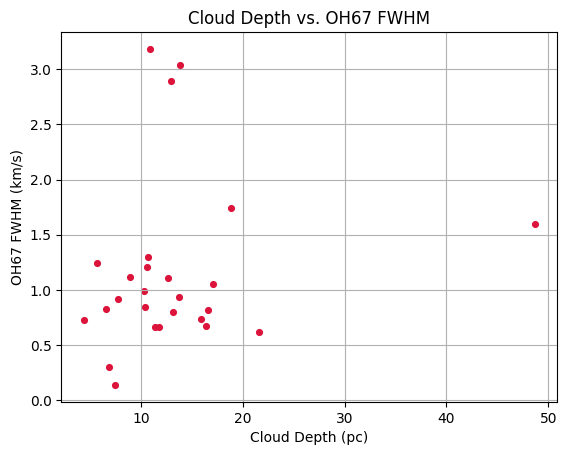

In [14]:
#Plot for depth v. FWHM
plt.scatter(cloud_depth, FWHM67_NoUpLim_arr, s=17, color = 'crimson')
plt.xlabel('Cloud Depth (pc)')
plt.ylabel('OH67 FWHM (km/s)')
plt.title('Cloud Depth vs. OH67 FWHM')
plt.grid(True)

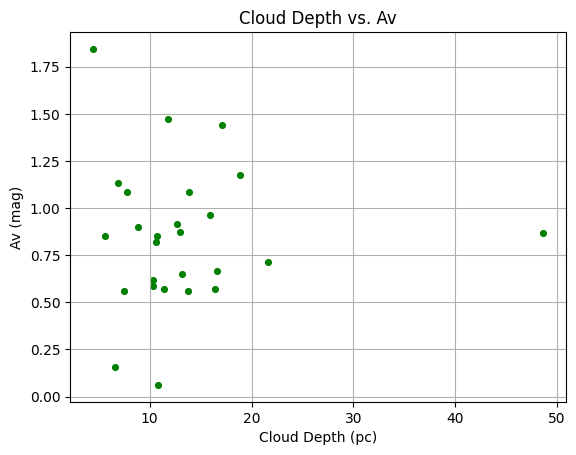

In [15]:
#Plot for depth v. max Av
plt.scatter(cloud_depth, max_Av_arr, s=17, color = 'green')
plt.xlabel('Cloud Depth (pc)')
plt.ylabel('Av (mag)')
plt.title('Cloud Depth vs. Av')
plt.grid(True)

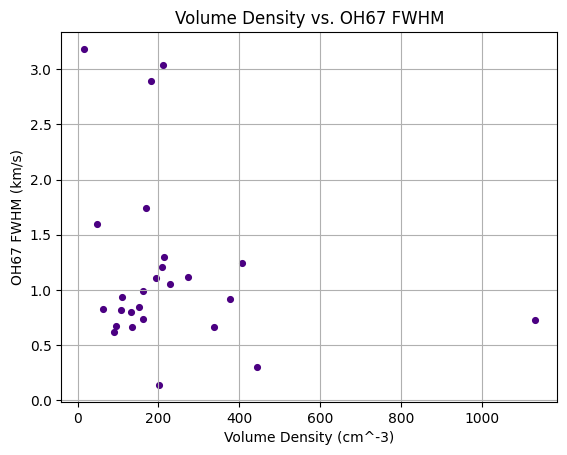

In [16]:
#Plot for depth v. FWHM

plt.scatter(voldens, FWHM67_NoUpLim_arr, s=17, color = 'indigo')
plt.xlabel('Volume Density (cm^-3)')
plt.ylabel('OH67 FWHM (km/s)')
plt.title('Volume Density vs. OH67 FWHM')
plt.grid(True)

IndexError: index 22 is out of bounds for axis 0 with size 22

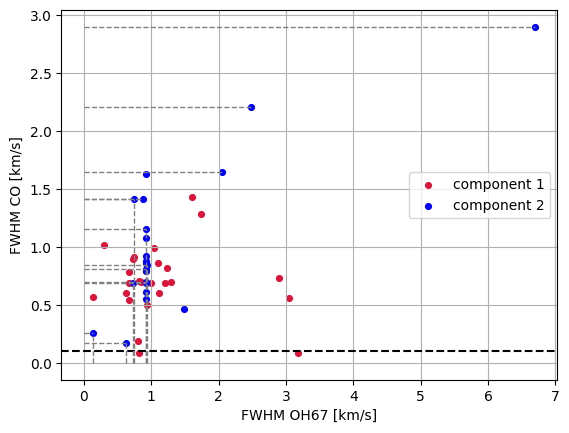

In [17]:
plt.scatter(FWHM67_NoUpLim_arr, FWHMCO_NoUpLim_arr, color = 'crimson', s = 17, label = 'component 1')
plt.scatter(FWHM67_2ndcomp_arr, FWHMCO_2ndcomp_arr, color = 'blue', s = 17, label = 'component 2')
# Add dashed guide lines for points where either line is an upper limit
plt.grid(True)
plt.xlabel('FWHM OH67 [km/s]')
plt.ylabel('FWHM CO [km/s]')
plt.axhline(0.1, color = 'black', ls = 'dashed')
plt.legend()
for i in range(min(len(OH67_2ndcomp_df), len(CO_2ndcomp_df))):
    is_upper_limit_OH67 = OH67_2ndcomp_df.iloc[i]['Upper Limit'] == 'T'
    is_upper_limit_CO   = CO_2ndcomp_df.iloc[i]['Upper Limit'] == 'T'

    x = FWHM67_2ndcomp_arr[i]
    y = FWHMCO_2ndcomp_arr[i]

    if is_upper_limit_OH67:
        plt.plot([x, x], [0, y], ls='dashed', color='gray', linewidth=1)  # vertical line from x-axis
    if is_upper_limit_CO:
        plt.plot([0, x], [y, y], ls='dashed', color='gray', linewidth=1)  # horizontal line from y-axis


In [18]:
print(OH67_2ndcomp_df.columns)

Index(['l (deg)', 'b (deg)', 'line', 'comp', 'T_peak (K)', 'T_error (K)',
       'CenterVel (km/s)', 'CenterVel_error (km/s)', 'FWHM (km/s)',
       'FWHM error (km/s)', 'integral', 'integral error', 'Cloud',
       'Upper Limit'],
      dtype='object')


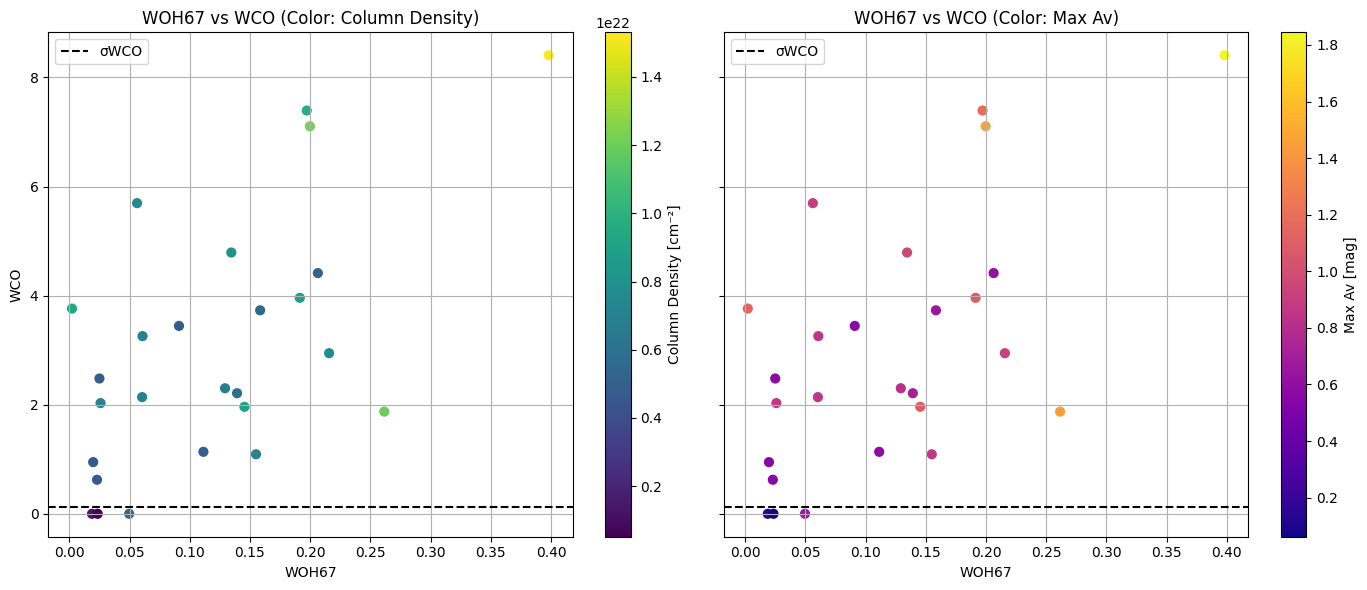

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot 1: Color by Column Density
sc1 = ax1.scatter(WOH67, WCO, c=col_dens, cmap='viridis', s=40)
cb1 = fig.colorbar(sc1, ax=ax1)
cb1.set_label('Column Density [cm⁻²]')
ax1.axhline(avgsigWCO, color='black', linestyle='--', label='σWCO')
ax1.set_title('WOH67 vs WCO (Color: Column Density)')
ax1.set_xlabel('WOH67')
ax1.set_ylabel('WCO')
ax1.grid(True)
ax1.legend()

# Plot 2: Color by Max Av
sc2 = ax2.scatter(WOH67, WCO, c=max_Av_arr, cmap='plasma', s=40)
cb2 = fig.colorbar(sc2, ax=ax2)
cb2.set_label('Max Av [mag]')
ax2.axhline(avgsigWCO, color='black', linestyle='--', label='σWCO')
ax2.set_title('WOH67 vs WCO (Color: Max Av)')
ax2.set_xlabel('WOH67')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

In [20]:
plot_df = pd.DataFrame({
    'WOH67': WOH67,
    'WCO': WCO,
    'sigWCO': sigWCO,
    'Cloud': CO_NoUpLim_df['Cloud'].values,  # assumes same order
    'col_dens': col_dens,  # assumes b19df aligns row-wise
    'max_Av_arr': max_Av_arr,
    'vol_dens': voldens
})

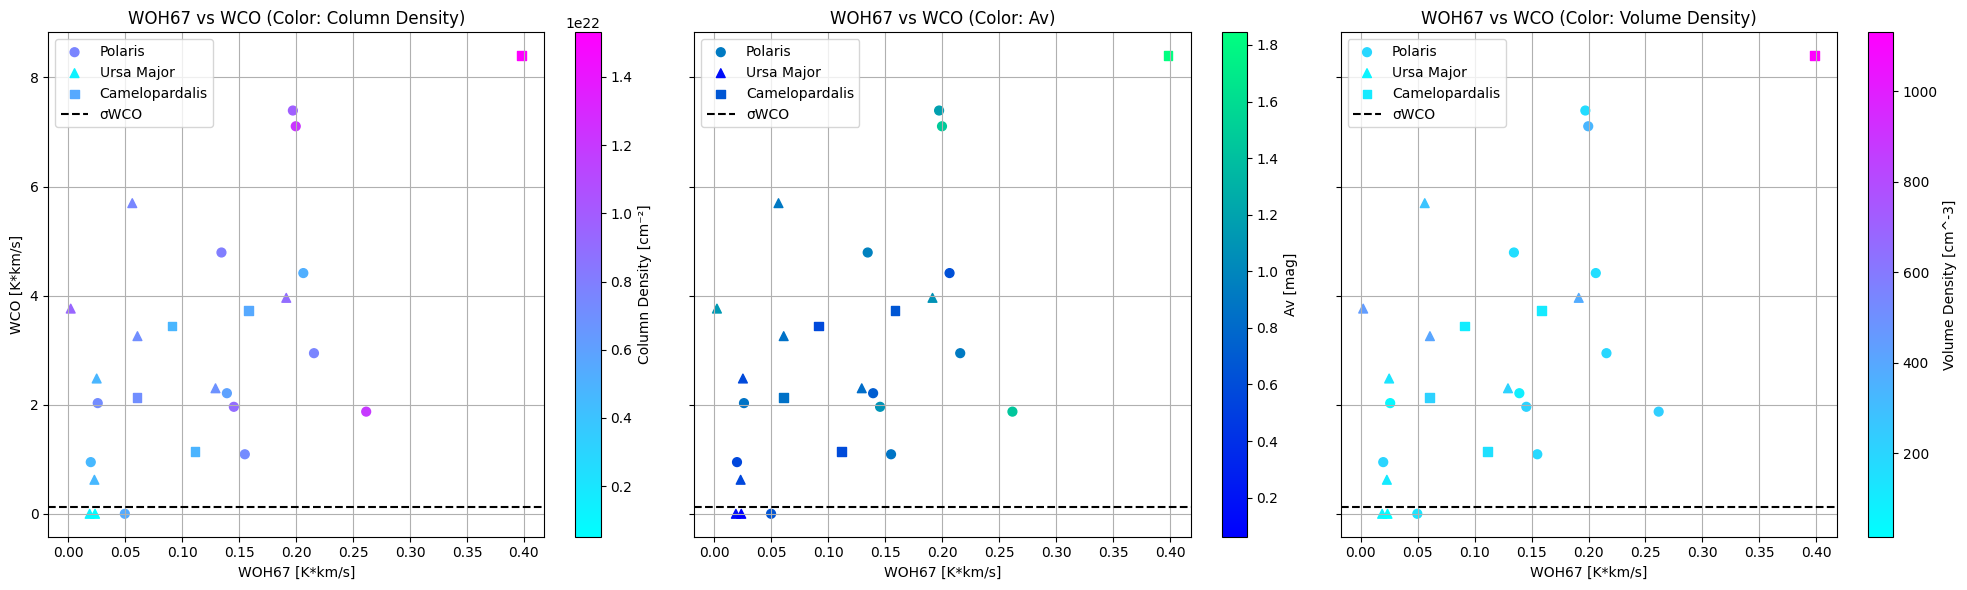

In [21]:
unique_clouds = plot_df['Cloud'].unique()
markers = ['o', '^', 's']  # Add more if needed

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)

vmin_col = plot_df['col_dens'].min()
vmax_col = plot_df['col_dens'].max()
vmin_av = plot_df['max_Av_arr'].min()
vmax_av = plot_df['max_Av_arr'].max()
vmin_vol = plot_df['vol_dens'].min()
vmax_vol = plot_df['vol_dens'].max()

for i, cloud in enumerate(unique_clouds):
    subdf = plot_df[plot_df['Cloud'] == cloud]
    marker = markers[i % len(markers)]

    sc1 = ax1.scatter(subdf['WOH67'], subdf['WCO'], c=subdf['col_dens'],
                      cmap='cool', s=40, marker=marker, label=cloud,
                      vmin=vmin_col, vmax=vmax_col)
    
    sc2 = ax2.scatter(subdf['WOH67'], subdf['WCO'], c=subdf['max_Av_arr'],
                      cmap='winter', s=40, marker=marker, label=cloud,
                      vmin=vmin_av, vmax=vmax_av)
    sc3 = ax3.scatter(subdf['WOH67'], subdf['WCO'], c=subdf['vol_dens'],
                      cmap='cool', s=40, marker=marker, label=cloud,
                      vmin=vmin_vol, vmax=vmax_vol)

# Add colorbars
cb1 = fig.colorbar(sc1, ax=ax1)
cb1.set_label('Column Density [cm⁻²]')
cb2 = fig.colorbar(sc2, ax=ax2)
cb2.set_label('Av [mag]')
cb3 = fig.colorbar(sc3, ax=ax3)
cb3.set_label('Volume Density [cm^-3]')

# Horizontal lines
ax1.axhline(avgsigWCO, color='black', linestyle='--', label='σWCO')
ax2.axhline(avgsigWCO, color='black', linestyle='--', label='σWCO')
ax3.axhline(avgsigWCO, color='black', linestyle='--', label='σWCO')

# Titles, labels, etc.
ax1.set_title('WOH67 vs WCO (Color: Column Density)')
ax1.set_xlabel('WOH67 [K*km/s]')
ax1.set_ylabel('WCO [K*km/s]')
ax1.grid(True)
ax1.legend()

ax2.set_title('WOH67 vs WCO (Color: Av)')
ax2.set_xlabel('WOH67 [K*km/s]')
ax2.grid(True)
ax2.legend()

ax3.set_title('WOH67 vs WCO (Color: Volume Density)')
ax3.set_xlabel('WOH67 [K*km/s]')
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()

## WCO and WOH --> N(OH) vs W(CO) --> N(H2_OH) vs N(H2_CO)

### Equations (Found from Bolatto 2013, Busch 2024, and Busch 2019):

$$ X_{CO} = \frac{N(H_2)}{(W(CO))} $$

$$N(OH) = C\frac{T_{ex}}{T_{ex}-T_c} \int T_b(\nu)d\nu $$ 

where $ \int T_b(\nu)d\nu $ is WOH.

$$ T_{ex} = 5K, T_c = 3K$$

Median Literature Value for N(OH)/N(H2) Ratio: $$\frac{N_{OH}}{N_{H2}} = 1\times 10^{-7}$$

N(H2) from CO: $$N(H_{2, CO}) = X_{CO}W(CO),$$ note this is the J = 0 to 1 transition. 


We use the XCO Factor for the Milky Way from Busch 2024 (via Bolatto 2013): $$X_{CO} = 2\times 10^{-20} cm^{-2}$$



In [26]:
#Define Constants:
XCO = 2*10**-20
C1667 = 2.3*10**14
#C1665 = same???

#calculate N(OH)
def NOHfinder(Tex, Tc, WOH):
    NOH = C1667*Tex/(Tex-Tc) * WOH
    return NOH

#Calculate NH2_OH
def NH2viaOH(NOH):
    NH2OH = NOH*10**7
    return NH2OH

#Calculate NH2_CO
def NH2viaCO(WCO):
    NH2CO = XCO*WCO
    return NH2CO

